In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import util

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Duo et al. datasets
dspath=['../data/Koh/koh.h5ad','../data/Kumar/kumar.h5ad', '../data/simkumar/simkumar4easy.h5ad','../data/simkumar/simkumar4hard.h5ad','../data/simkumar/simkumar8hard.h5ad','../data/Trapnell/trapnell.h5ad','../data/zheng/sce_full_Zhengmix4eq.h5ad','../data/zheng/sce_full_Zhengmix4uneq.h5ad','../data/zheng/sce_full_Zhengmix8eq.h5ad']
dsname=['Koh','Kumar','simkumar4easy','simkumar4hard','simkumar8hard','Trapnell','Zheng4eq','Zheng4uneq','Zheng8eq']

removals = [0.025, 0.05, 0.1]
# baseline_nmi = [0.809, 0.924, 0.736, 0.196, 0.436, 0.283, 0.637, 0.718, 0.551]
# baseline_ari = [0.691, 0.951, 0.606, 0.160, 0.262, 0.267, 0.629, 0.738, 0.399]

def process(data,cs,labels,dimension,fix_ch,removal_type,C=None):
    
    if C is None:
        C = util.get_compression_matrix(data,cs,dimension,True,True)
    
    ari, nmi = util.pca_kmeans(data,len(cs),labels,dimension)
    print('PCA Kmeans: ', ari, nmi)

    ari_rem, nmi_rem = [], []

    for removal in removals: 
        rem_ari, rem_nmi = util.remove_pca_kmeans(data,cs,labels,dimension,removal,True,C,removal_type)
        ari_rem.append(rem_ari)
        nmi_rem.append(rem_nmi)
    
    print('PCA Kmeans with removal: ', ari_rem, nmi_rem)
    return ari, nmi, ari_rem, nmi_rem

In [3]:
nmi_resuls = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_results = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

baseline_nmi = []
baseline_ari = []

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs)
    C = np.load(dspath[i][:-5]+'_C_cs.npy')

    print('Dataset: ', dsname[i])
    ari, nmi, ari_rem, nmi_rem = process(data,cs,labels,k,i,'compression',C)
    baseline_nmi.append(nmi)
    baseline_ari.append(ari)
    print()

    ari_results['2.5% removal'] += (ari_rem[0] - baseline_ari[i],)
    ari_results['5% removal'] += (ari_rem[1] - baseline_ari[i],)
    ari_results['10% removal'] += (ari_rem[2] - baseline_ari[i],)
    nmi_resuls['2.5% removal'] += (nmi_rem[0] - baseline_nmi[i],)
    nmi_resuls['5% removal'] += (nmi_rem[1] - baseline_nmi[i],)
    nmi_resuls['10% removal'] += (nmi_rem[2] - baseline_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.8052983712631564 0.8661362611705077
PCA Kmeans with removal:  [0.8274849007961582, 0.850335607192295, 0.8821063268545484] [0.8860109847121344, 0.9005875353772472, 0.9273295921862077]

Dataset:  Kumar
PCA Kmeans:  0.9507837448896125 0.923781516234857
PCA Kmeans with removal:  [1.0, 1.0, 1.0] [1.0, 1.0, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.6269079977614556 0.7618201338574817
PCA Kmeans with removal:  [0.6335259801673694, 0.635247942257319, 0.6294851818323872] [0.8009697792633819, 0.801157155555881, 0.8002458146110649]

Dataset:  simkumar4hard
PCA Kmeans:  0.16482763251632726 0.2372889243250709
PCA Kmeans with removal:  [0.16214795837225693, 0.16268215025011482, 0.16035371264723391] [0.2367426888171267, 0.2417004274750626, 0.2508256378824115]

Dataset:  simkumar8hard
PCA Kmeans:  0.2846432279677446 0.4533786128669859
PCA Kmeans with removal:  [0.38816840230396754, 0.3933991387561798, 0.4052043654113361] [0.5549836228432216, 0.5562168077149426, 0.584644

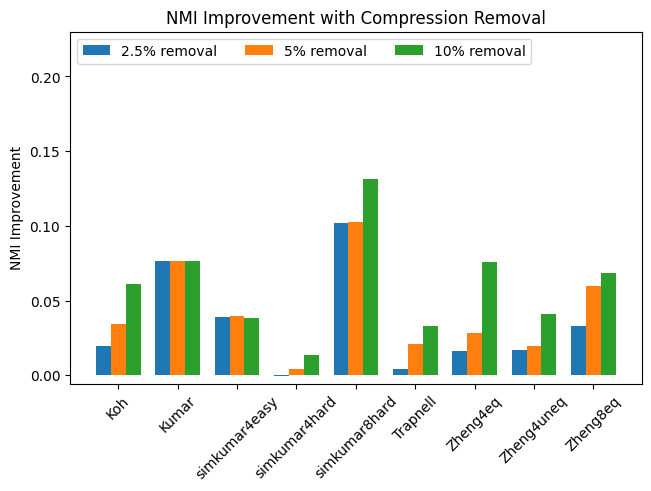

In [4]:
util.improvement_graph(dsname, nmi_resuls,"NMI Improvement with Compression Removal")

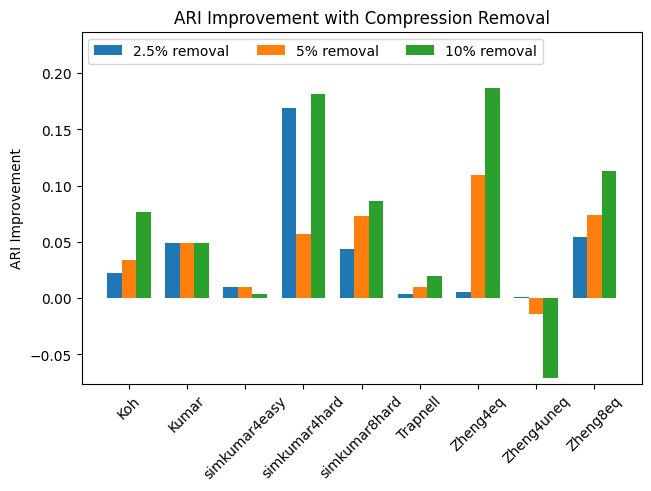

In [81]:
util.improvement_graph(dsname, ari_results, "ARI Improvement with Compression Removal", "ARI")

In [82]:
nmi_plus5 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_plus5 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs) + 5

    print('Dataset: ', dsname[i])
    C = np.load(dspath[i][:-5]+'_C_cs_plus5.npy')
    ari, nmi, ari_rem, nmi_rem = process(data,cs,labels,k,i,'compression',C)
    print()

    ari_plus5['2.5% removal'] += (ari_rem[0] - baseline_ari[i],)
    ari_plus5['5% removal'] += (ari_rem[1] - baseline_ari[i],)
    ari_plus5['10% removal'] += (ari_rem[2] - baseline_ari[i],)
    nmi_plus5['2.5% removal'] += (nmi_rem[0] - baseline_nmi[i],)
    nmi_plus5['5% removal'] += (nmi_rem[1] - baseline_nmi[i],)
    nmi_plus5['10% removal'] += (nmi_rem[2] - baseline_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.7961447816629837 0.8557461692114352
PCA Kmeans with removal:  [0.8570508845660982, 0.8431385294855064, 0.9357564788169378] [0.9051672456764898, 0.8930997059525416, 0.9474271260450352]

Dataset:  Kumar
PCA Kmeans:  0.9637268233080815 0.9391626733184055
PCA Kmeans with removal:  [0.9864293224142668, 1.0, 1.0] [0.9788940664533072, 1.0, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.625366057481096 0.7442443975455176
PCA Kmeans with removal:  [0.841226348904036, 0.6402693082431358, 0.6288882489932185] [0.8161576957778417, 0.8037587788528572, 0.8019378094031973]

Dataset:  simkumar4hard
PCA Kmeans:  0.16482763251632726 0.23728892432507084
PCA Kmeans with removal:  [0.16409592074376436, 0.27316525462841834, 0.2295885288690549] [0.23563734093339533, 0.43965305177548425, 0.28507692703414683]

Dataset:  simkumar8hard
PCA Kmeans:  0.3067789927089323 0.4577497610159251
PCA Kmeans with removal:  [0.2879163753779442, 0.40473745620669027, 0.39878139742316615] [0.4512833476

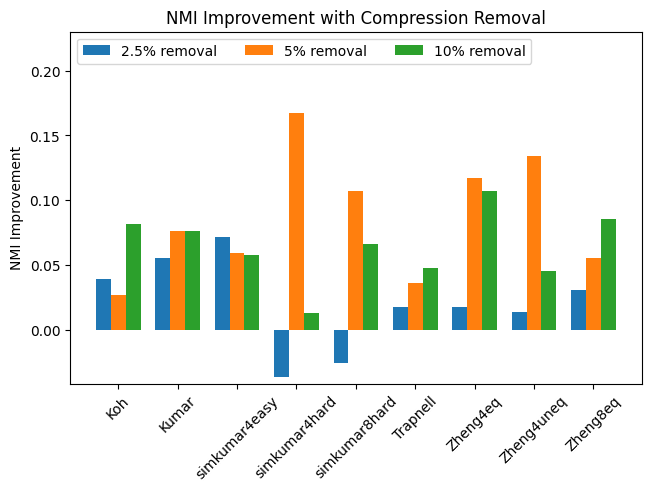

In [83]:
util.improvement_graph(dsname, nmi_plus5,"NMI Improvement with Compression Removal")

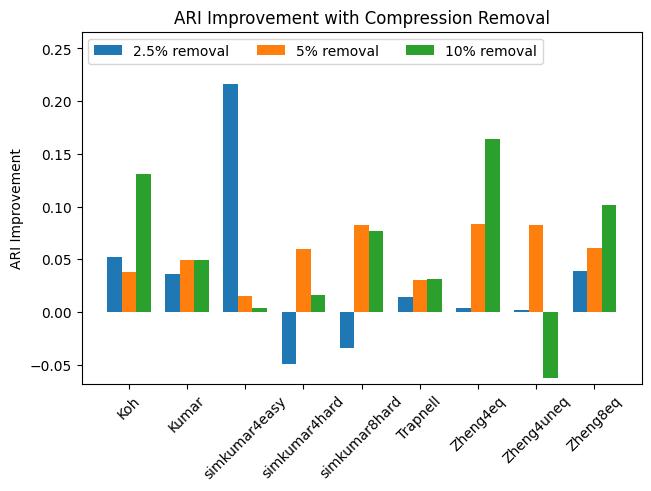

In [84]:
util.improvement_graph(dsname, ari_plus5, "ARI Improvement with Compression Removal", "ARI")

In [63]:
nmi_plus10 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

ari_plus10 = {
    '2.5% removal': tuple(),
    '5% removal': tuple(),
    '10% removal': tuple(),
}

for i in range(len(dspath)):
    data, cs, labels = util.initiate(fix_ch=i, dsname=dsname, dspath=dspath)
    k = len(cs) + 10

    print('Dataset: ', dsname[i])
    C = np.load(dspath[i][:-5]+'_C_cs_plus10.npy')
    ari, nmi, ari_rem, nmi_rem = process(data,cs,labels,k,i,'compression',C)
    print()

    ari_plus10['2.5% removal'] += (ari_rem[0] - baseline_ari[i],)
    ari_plus10['5% removal'] += (ari_rem[1] - baseline_ari[i],)
    ari_plus10['10% removal'] += (ari_rem[2] - baseline_ari[i],)
    nmi_plus10['2.5% removal'] += (nmi_rem[0] - baseline_nmi[i],)
    nmi_plus10['5% removal'] += (nmi_rem[1] - baseline_nmi[i],)
    nmi_plus10['10% removal'] += (nmi_rem[2] - baseline_nmi[i],)

Dataset:  Koh
PCA Kmeans:  0.7959207806551762 0.8618457252677263
PCA Kmeans with removal:  [0.8302800962768891, 0.8338449605597856, 0.8692218337855214] [0.8885844426765174, 0.8929364745216805, 0.9079015547542361]

Dataset:  Kumar
PCA Kmeans:  0.9637268233080815 0.9391626733184053
PCA Kmeans with removal:  [0.9864368866369996, 0.9860151733580024, 1.0] [0.978886590067838, 0.9783565324752096, 1.0]

Dataset:  simkumar4easy
PCA Kmeans:  0.6260364490848396 0.7616272695396566
PCA Kmeans with removal:  [0.6417217021001456, 0.8952406961626551, 0.6328805944870246] [0.7955782853977973, 0.8710142314676664, 0.7962251595134393]

Dataset:  simkumar4hard
PCA Kmeans:  0.15944785927862282 0.23349525339309635
PCA Kmeans with removal:  [0.21568245021876276, 0.21783462098947237, 0.18201253259376435] [0.274104773399494, 0.27528141438859854, 0.28059574017269373]

Dataset:  simkumar8hard
PCA Kmeans:  0.3311390453205785 0.43804185555232705
PCA Kmeans with removal:  [0.27797396964862675, 0.3650193586627411, 0.3

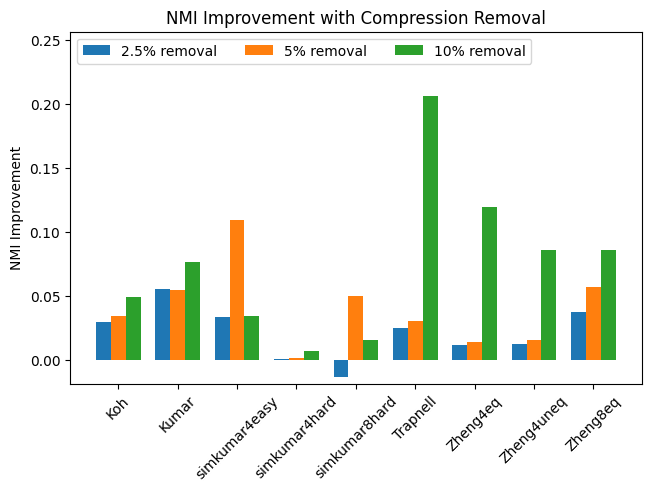

In [64]:
util.improvement_graph(dsname, nmi_plus10,"NMI Improvement with Compression Removal")

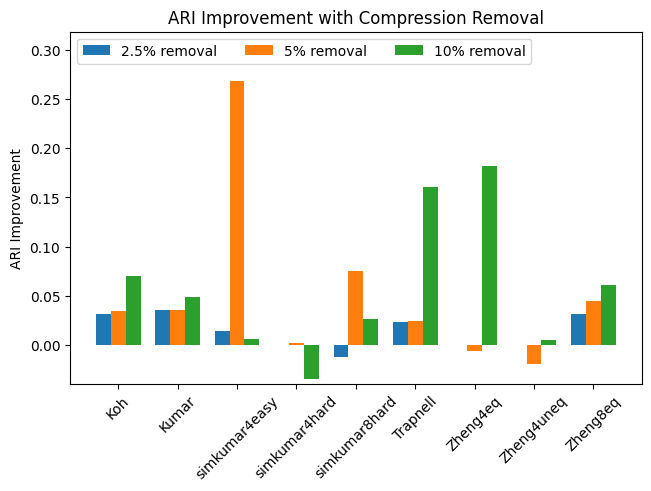

In [66]:
util.improvement_graph(dsname, ari_plus10, "ARI Improvement with Compression Removal", "ARI")